# Rode wijn in Portugal

Voor de Data Science casusopdracht heeft onze groep de rode wijn data set als onderzoekopdracht. In het eerste gedeelte van dit document zal er een een verkenning van de data plaatsvinden, waardoor er gerichte en interessante onderzoeksvragen opgesteld kunnen worden.

## Verkenning

Als eerste stap van de verkenning zal er onderzoek gedaan worden naar de huidige velden en de mogelijke verbeteringen aan de data set.

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
redwine = pd.read_csv('redwine.csv', sep=';')
redwine.head()

,id,country,description,designation,points,price,province,taster_name,title,variety,...,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Kerin OKeefe,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,...,0.29,0.4,2.9,0.098,10.0,26.0,10.006,3.48,0.91,9.7
1,2,Portugal,"From an estate in the south of the Alentejo, t...",Grande Reserva Tinto,91,26.0,Alentejano,Roger Voss,Casa Santa Vitória 2013 Grande Reserva Tinto R...,Portuguese Red,...,0.26,0.37,1.4,0.076,8.0,23.0,0.9974,3.26,0.70,9.6
2,3,Portugal,A year in wood and 30 months in bottle before ...,Montes Claros Garrafeira,90,28.0,Alentejo,Paul Gregutt,Adega Cooperativa de Borba 2012 Montes Claros ...,Portuguese Red,...,0.69,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3
3,4,Portugal,Wood aging gives this ripe blend of Baga and T...,NaN,90,20.0,Beira Atlantico,Alexander Peartree,Quinta de Foz de Arouce 2013 Red (Beira Atlant...,Portuguese Red,...,0.69,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3
4,5,Portugal,"A powerful wine, richly structured and full of...",Gerações Colheita Seleccionada,92,34.0,Alentejano,Paul Gregutt,Herdade Grande 2010 Gerações Colheita Seleccio...,Portuguese Red,...,0.48,0.34,2.2,0.073,16.0,25.0,0.9936,3.28,0.66,12.4


In [3]:
redwine.set_index('id', inplace=True)

In [4]:
# Eerst eens bekijken hoeveel records we op dit moment hebben
len(redwine)

2465

In [5]:
# Bekijken hoeveel records het scheelt met ontbrekende waardes
len(redwine.dropna())

2064

Hier zit best een fors verschil tussen, waardoor er met meer detail naar de data gekeken moet worden.

Daarnaast valt het ons op dat de country en variety velden allemaal gelijke data bevatten, waardoor deze irrelevant zijn.

In [6]:
redwine.drop(['country', 'variety'], axis=1, inplace=True)
redwine.head()

,description,designation,points,price,province,taster_name,title,winery,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
id,,,,,,,,,,,,,,,,,,,
1,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Kerin OKeefe,Quinta dos Avidagos 2011 Avidagos Red (Douro),Quinta dos Avidagos,10.0,0.29,0.4,2.9,0.098,10.0,26.0,10.006,3.48,0.91,9.7
2,"From an estate in the south of the Alentejo, t...",Grande Reserva Tinto,91,26.0,Alentejano,Roger Voss,Casa Santa Vitória 2013 Grande Reserva Tinto R...,Casa Santa Vitória,8.3,0.26,0.37,1.4,0.076,8.0,23.0,0.9974,3.26,0.70,9.6
3,A year in wood and 30 months in bottle before ...,Montes Claros Garrafeira,90,28.0,Alentejo,Paul Gregutt,Adega Cooperativa de Borba 2012 Montes Claros ...,Adega Cooperativa de Borba,7.0,0.69,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3
4,Wood aging gives this ripe blend of Baga and T...,NaN,90,20.0,Beira Atlantico,Alexander Peartree,Quinta de Foz de Arouce 2013 Red (Beira Atlant...,Quinta de Foz de Arouce,7.0,0.69,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3
5,"A powerful wine, richly structured and full of...",Gerações Colheita Seleccionada,92,34.0,Alentejano,Paul Gregutt,Herdade Grande 2010 Gerações Colheita Seleccio...,Herdade Grande,8.0,0.48,0.34,2.2,0.073,16.0,25.0,0.9936,3.28,0.66,12.4


Hieronder tellen we het aantal rijen met missende data per kolom.

In [28]:
redwine.isna().sum()

description               0
designation             153
points                    0
price                   269
province                  0
taster_name               0
title                     0
winery                    0
fixed acidity             0
volatile acidity          0
citric acid               0
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH                        0
sulphates                 0
alcohol                   0
dtype: int64

Het valt op dat alle missende data voorkomt bij designation en price, echter zijn er ook een aantal kolommen die niet het goede type zijn. Deze zullen zeer waarschijnlijk dus ook data bevatten die niet als float gecast kan worden.

In [29]:
redwine.dtypes

description              object
designation              object
points                    int64
price                   float64
province                 object
taster_name              object
title                    object
winery                   object
fixed acidity           float64
volatile acidity        float64
citric acid              object
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                  object
pH                      float64
sulphates               float64
alcohol                  object
dtype: object



### Tweede dataset

Als tweede dataset is er een set gepakt welke ook de zelfde chemische samenstellingen bevat als de huidige set, alleen is deze gericht op witte wijnen.

In [27]:
whitewine = pd.read_csv('winequality-white.csv', sep=';')
whitewine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In tegenstelling tot bij de rode wijn, is er niet veel informatie over de regio en naamgeving van de wijn beschikbaar. Daarnaast is het een kwaliteitscijfer en niet een waardering van een reviewer, waardoor de cijfers niet direct te vergelijken zijn.

Bij de witte wijn set worden alle kolommen wel correct ingelezen:

In [23]:
whitewine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

### Histogrammen

Om meer inzicht te krijgen in de verdelingen van de stoffen, is voor elke stof een histogram opegsteld. Ook voor de pH, quality en alcohol waardes zijn grafieken gemaakt.

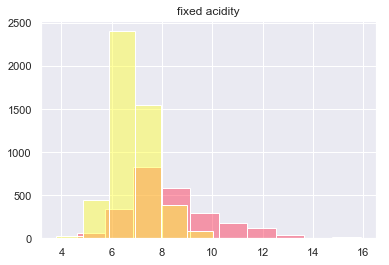

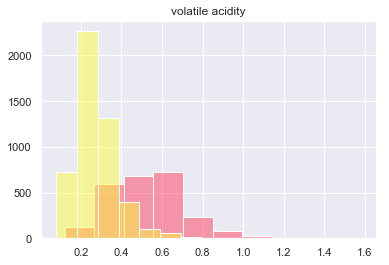

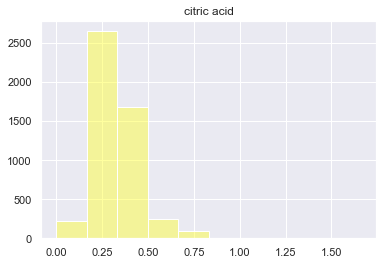

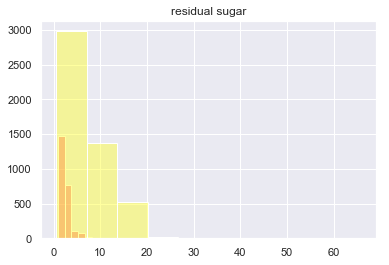

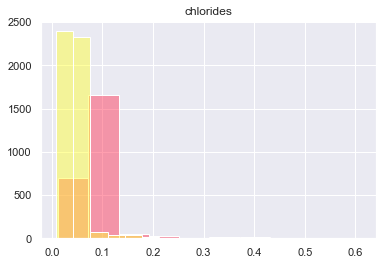

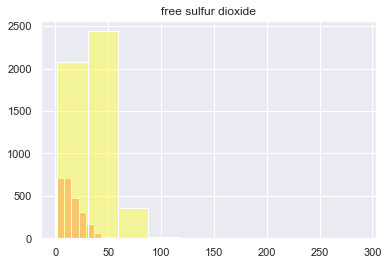

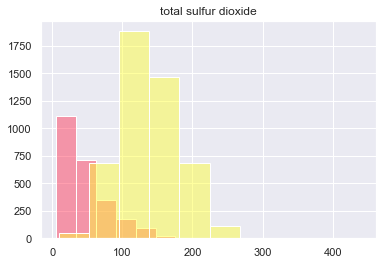

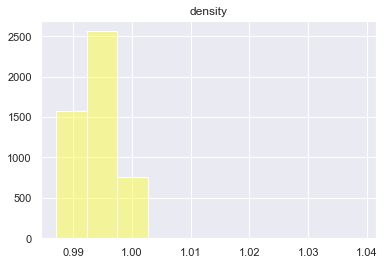

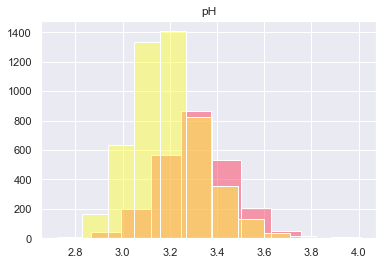

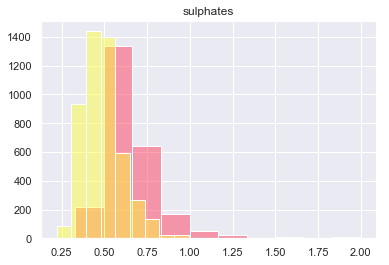

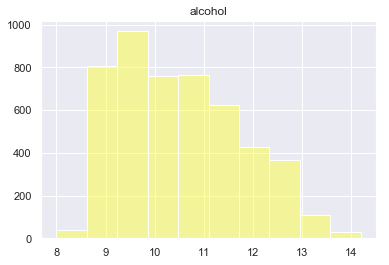

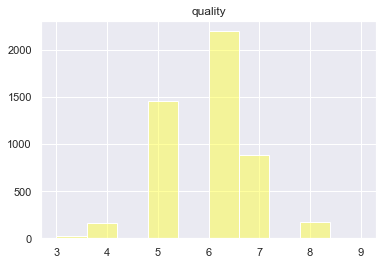

In [26]:
sns.set()
for column in whitewine.columns.values:
    plt.title(column)
    if column in redwine:
        if redwine[column].dtype != "object":
            plt.hist(redwine[column], color="#ff335577")
    plt.hist(whitewine[column], color="#ffff3377")
    plt.show()

## Onderzoeksvragen
Een eis voor het voltooien van deze casus is het opstellen (en beantwoorden) van onderzoeksvragen. Hierbij moet er rekening gehouden worden met de data die is aangeleverd en moet er een combinatie gemaakt worden met een externe set van data.

In het vorige gedeelte is een externe set verkend, welke betrekking heeft op witte wijnen in plaats van rode.

Met deze twee datasets en alle gegevens erin zijn we tot de volgende onderzoeksvragen gekomen:

-   Welke proefpersonen geven gemiddeld meer of minder punten voor een wijn en hoeveel is dit?
-   Zijn er groepen te onderscheiden in de wijn op basis van de stoffen en de wijnmakerijen?
-   In hoeverre is de score van een Portugese Red te voorspellen op basis van de chemische kenmerken?
-   Wat zijn de verschillen in verhoudingen van de chemische kenmerken bij rode tov witte wijnen?
